In [1]:
#Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/content/drive/MyDrive/seattle-weather.csv')

In [5]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [6]:
df.isnull().sum()

,0
date,0
precipitation,0
temp_max,0
temp_min,0
wind,0
weather,0


In [7]:
df.duplicated().sum()

0

In [10]:
#Coulmn temp_max converted into numpy array
training_set = df.iloc[:,2:3].values
training_set

array([[12.8],
       [10.6],
       [11.7],
       ...,
       [ 7.2],
       [ 5.6],
       [ 5.6]])

In [11]:
#create sequences of data to prepare for time series forecasting
import numpy as np

def df_to_XY(df, window_size=10):
    training_set = df.iloc[:, 2:3].values  # Assuming the third column is the target feature
    X_train = []
    y_train = []

    for i in range(window_size, len(training_set)):
        X_train.append(training_set[i - window_size:i, 0])  # Last 'window_size' values
        y_train.append(training_set[i, 0])  # Value at current index

    X_train, y_train = np.array(X_train), np.array(y_train)
    return X_train, y_train


In [12]:
#Splitting into training, validation, and test sets:
WINDOW = 10
X, y = df_to_XY(df, WINDOW)
print(len(X),len(y))
X_train = X[:800]
y_train = y[:800]
X_val = X[800:1000]
y_val = y[800:1000]
X_test = X[1000:]
y_test = y[1000:]

1451 1451


In [ ]:
#Reshaping(To add new dimensions)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


So, after reshaping:

For X_train: If X_train.shape was initially (790, 10), where 790 is the number of samples and 10 is the window size (time steps), after reshaping, X_train.shape will become (790, 10, 1), which means you now have:

790 samples (data points),
Each sample has 10 time steps (previous values used for prediction),
Each time step has 1 feature (the value being predicted).

Why reshape?

RNN, LSTM, or CNN input requirement: These models expect 3D input: (samples, time_steps, features). The features dimension represents the number of variables for each time step. In your case, it’s 1 because you only have one value per time step.

In [15]:
#Building the RNN
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [17]:
model = Sequential()

In [18]:
#Adding the first LSTM layer and some Dropout regularisation

model.add(LSTM(units = 50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

#Second layer
model.add(LSTM(units = 50, return_sequences=True))
model.add(Dropout(0.2))

#Third layer
model.add(LSTM(units = 50, return_sequences=True))
model.add

#Output layer
model.add(Dense(units = 1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
#Compiling
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

In [20]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [21]:
#fitting the rnn to the training set
history = model.fit(X_train, y_train, epochs = 100, batch_size = 32, validation_data=(X_val, y_val))

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.0017 - loss: 260.9236 - val_accuracy: 0.0000e+00 - val_loss: 322.3313
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 1.2247e-04 - loss: 141.6549 - val_accuracy: 0.0000e+00 - val_loss: 195.0514
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 1.7000e-05 - loss: 86.3167 - val_accuracy: 0.0000e+00 - val_loss: 150.6333
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.0000e+00 - loss: 79.5397 - val_accuracy: 0.0000e+00 - val_loss: 121.7593
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.0000e+00 - loss: 64.1676 - val_accuracy: 0.0000e+00 - val_loss: 104.2768
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.0000e+00 - loss: 60.1668 - val_accuracy: 0.0000e+00 - val_loss: 94.2983
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.0000e+00 - loss: 56.3638 - val_accuracy: 0.0000e+00 - val_loss: 87.6366
Epoch 8/100
25/25 ━━━━━━━━━━━━━

In [23]:
#History to Dataframe
history_df = pd.DataFrame(history.history)
history_df.head()

,accuracy,loss,val_accuracy,val_loss
0,0.001129,236.261841,0.0,322.331329
1,0.000070,125.145546,0.0,195.051361
2,0.000016,85.994553,0.0,150.633286
3,0.000000,71.287086,0.0,121.759254
4,0.000000,62.880264,0.0,104.276833


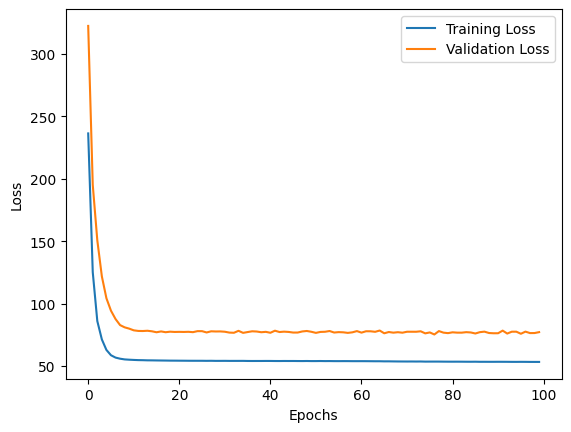

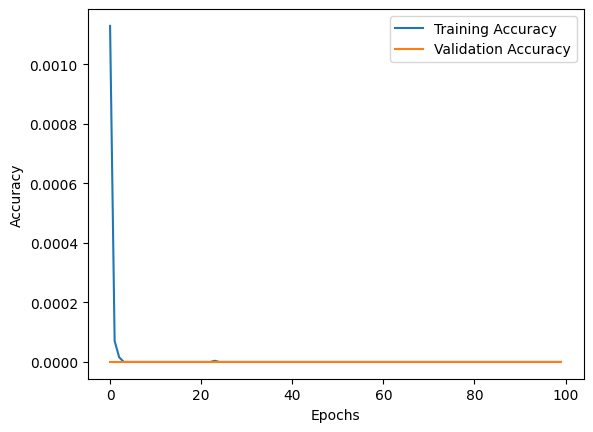

In [24]:
# Plotting training and validation loss over epochs
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# You can also plot metrics, e.g., 'accuracy', if applicable
if 'accuracy' in history.history:
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()


In [26]:
#Making predictions with your trained model on the training set, validation set, and test set, respectively, and then flatten the predictions into one-dimensional arrays.
train_pred = model.predict(X_train).flatten()
val_pred = model.predict(X_val).flatten()
test_pred = model.predict(X_test).flatten()

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


Why Flatten the Predictions?

In many machine learning and deep learning tasks, especially for regression, you often deal with predictions that are in a 2D shape (samples, 1) because each sample has a single output. However, many evaluation functions (like mean_squared_error, r2_score, etc.) expect the predictions in a 1D array ((samples,)). Flattening the predictions ensures that they are in the correct shape for comparison with the true values.